# Import basic liabraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Art Computer\\Machine Learning'

### Problem Statement and Domain Analysis
- The data is about the effect of advertising on the sales of the product.
- The data given contains the amount invested by differnt firms in different advertising media and the corresponding sales
- We are trying to evaluate the impact of advertising in different media on the sales.
- We will try to design a model that will predict the sales value based on amount invested in differnt media

# Loading the dataset

In [6]:
data=pd.read_csv("Advertising.csv")

In [7]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Basic checks

In [12]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
#data.head(),data.tail(),data.TV.mean()
#sns.distplot(data.TV)
#sns.histplot(data.TV,kde=True)
#sns.pairplot(data)
data.isnull().sum()
#sns.boxplot(data.TV)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
data.shape

(200, 5)

In [15]:
#droping column 
data.drop("Unnamed: 0", axis=1,inplace=True)

In [17]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Handle missings.

In [18]:
#Checking missing values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis
- We will examine the spread of each feature and presence of outliers and the way to handle it as a part of univariate analysis
- We'll see how each feature affects the other features as well as sales individually as a part of bivariate analysis
- We'll see how features are inter-correlated, so as to filter highly correlated features.

# To Identify Outliers:
1.It helps in detecting values that are unusually high or low compared to others.

2.To Summarize Data: You can calculate basic statistical measures such as: Mean, Median, Mode (for numerical data) Frequency counts (for categorical data) Minimum, Maximum, Standard Deviation, etc.

3.To Choose Right Model or Preprocessing Steps: Understanding variable types (continuous, categorical) helps in: Choosing appropriate encoding methods (like one-hot encoding for categorical) Deciding scaling/normalization for numerical data

To Detect Data Issues: Missing values, incorrect entries, or inconsistent categories can be spotted.

**When We Use Univariate Analysis**
You use Univariate Analysis:

1.At the start of Exploratory Data Analysis (EDA) — It’s the first step before bivariate or multivariate analysis.

2.When you want to describe a single feature — For example, analyzing "Age" of customers to see average or most common age group. 3.Before Feature Engineering — To decide how to handle missing values, outliers, or transformations. 4.For visual insights — You use graphs like:

Histogram → for numerical data

Boxplot → for outlier detection

Bar chart / Pie chart → for categorical data

In [19]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\Art Computer\AppData\Local\Temp\ipykernel_16216\2533676467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.TV)


<Axes: ylabel='Density'>

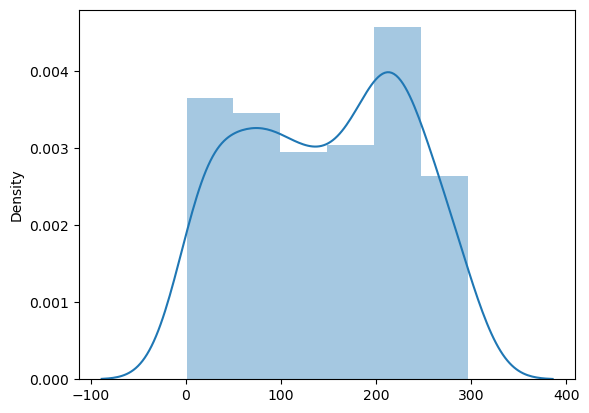

In [21]:
#drawing a dist plot fo TV :We use dist plot bcz TV have numerical data
sns.distplot(x=data.TV)

C:\Users\Art Computer\AppData\Local\Temp\ipykernel_16216\3910842401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Radio)


<Axes: ylabel='Density'>

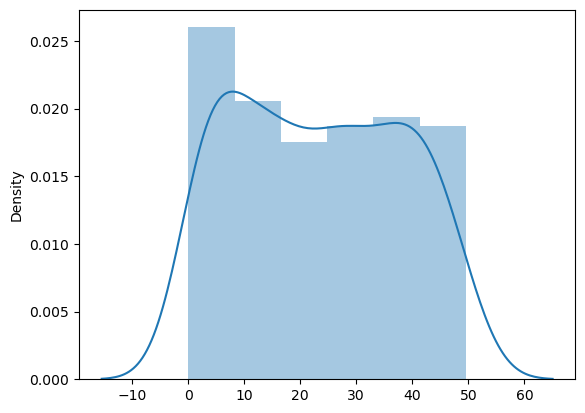

In [24]:
sns.distplot(x=data.Radio)

C:\Users\Art Computer\AppData\Local\Temp\ipykernel_16216\4219603776.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Newspaper)


<Axes: ylabel='Density'>

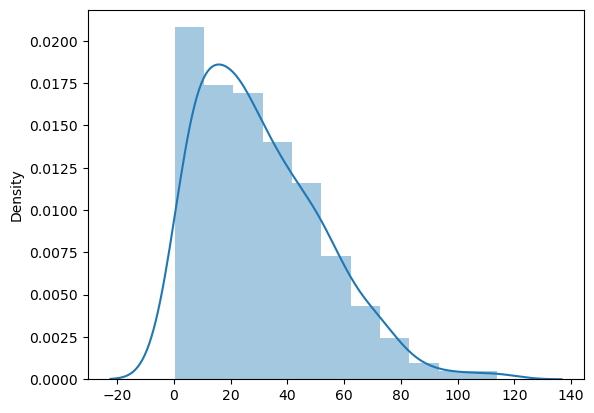

In [25]:
sns.distplot(x=data.Newspaper)

C:\Users\Art Computer\AppData\Local\Temp\ipykernel_16216\3660260747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Sales)


<Axes: ylabel='Density'>

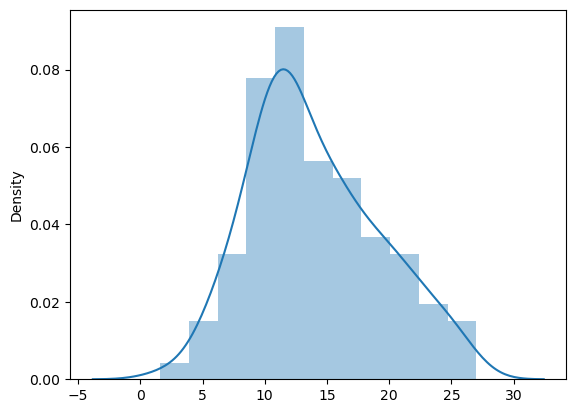

In [34]:
sns.distplot(x=data.Sales)

# Insights
Sales is representing Normally Distribution.

Tv Radio and Newspaper are representing skweness or normal.

# Bivariate
Bivariate analysis is the study of two variables (columns/features) to understand the relationship between them. Why We Use Bivariate Analysis

To Find Relationships Between Variables

To Check Correlation

To Compare Two Variables You can compare:

Two numerical variables

One categorical and one numerical variable

Two categorical variables

Numerical – Numerical Scatter, Line, Heatmap, Joint Seaborn / Matplotlib

Categorical – Numerical Box, Violin, Bar, Strip Seaborn

Categorical – Categorical Count, Heatmap, Stacked Bar Seaborn / Pandas / Matplotlib

<Axes: xlabel='TV', ylabel='Sales'>

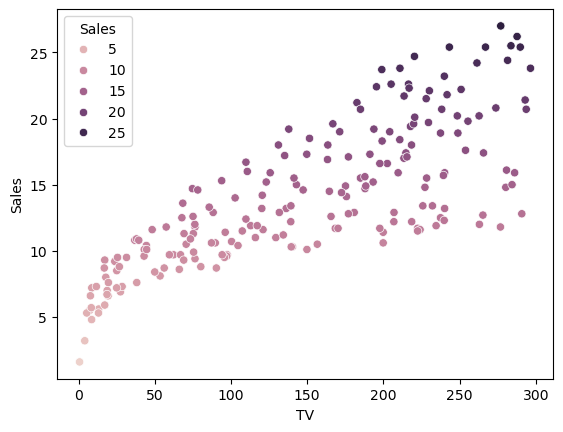

In [37]:
#Analyse how amount spent on TV impact sales
sns.scatterplot(data=data,x='TV',y='Sales',hue='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

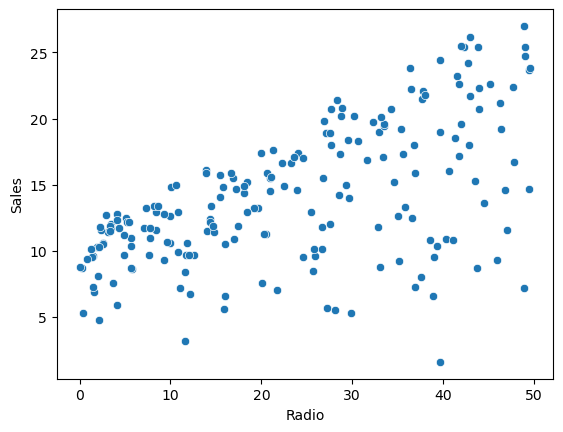

In [39]:
#Analyse how amount spent on Radio impact sales
sns.scatterplot(data=data,x='Radio',y='Sales')

# Insights
there is no strong corelation between Radio.

It dosent have must impact on sales.
    
we can see the high investment on Radio and sometime sales was high and sometimes sales was low.

<Axes: xlabel='Newspaper', ylabel='Sales'>

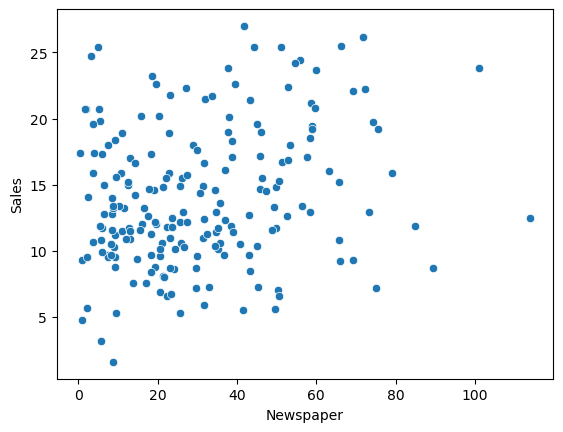

In [41]:
#Analyse how amount spent on NewsaPaper  impact sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')

# Insights
There is no coorrelation between Newspaper and Sales

# Multivariate
Multivariate Analysis is a statistical technique used to analyze data that involves more than one independent variable (feature) and one dependent variable (target).

It helps you understand relationships and patterns among multiple variables at the same time.
Purpose of Multivariate Analysis

To study interactions among variables.

To predict outcomes (dependent variable) from several inputs.

To reduce dimensions of large datasets.

To detect patterns, group similarities, or classify data.

Visualization Tools for Multivariate Analysis

Pair Plot (sns.pairplot()) → plots relationships between all numerical variables.

Heatmap (sns.heatmap()) → shows correlation between variables.

sns.pairplot(data=df)

# Insights of Above the graph
as we increase amount of money spent on Tv advertising then sales will be the increasng.

There is high correlation between TV and Sales.

There is Positive relation between TV and sales.
This suggests a linear relationship — making it a good case for Linear Regression modeling.

<Figure size 500x500 with 0 Axes>

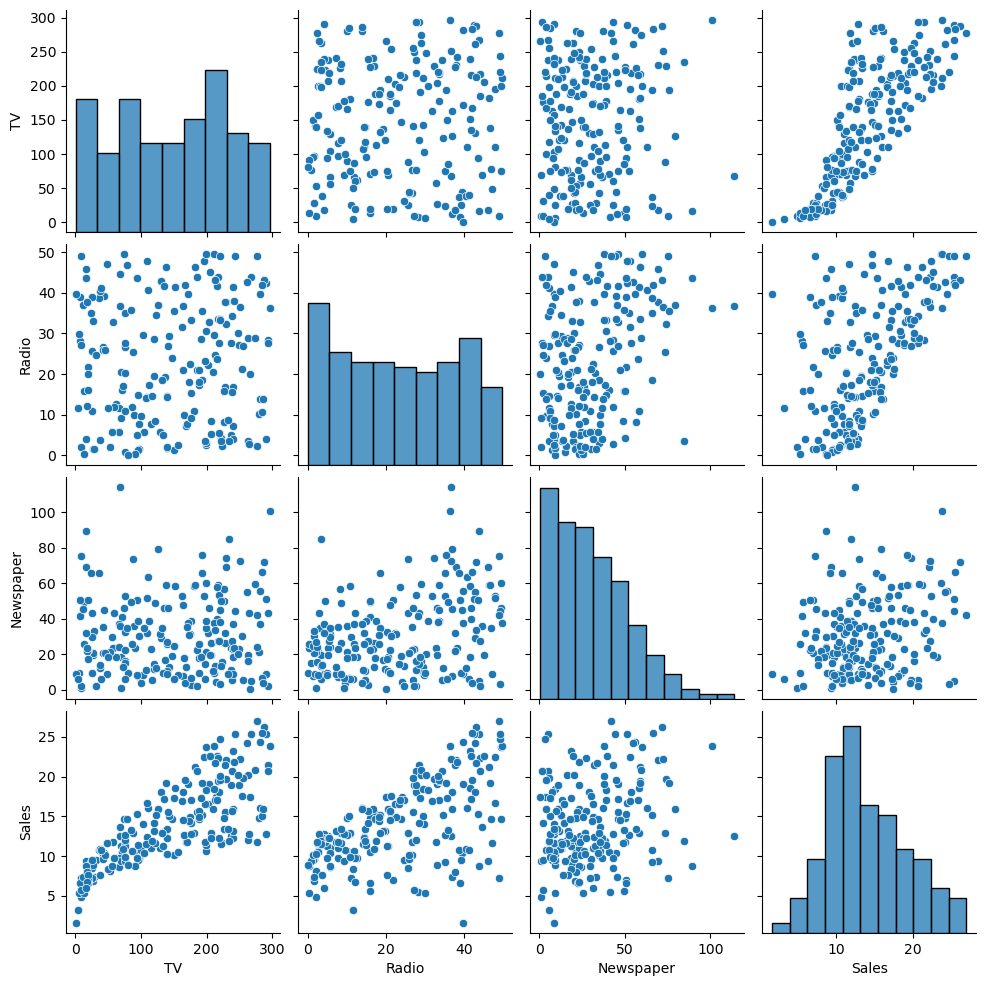

In [26]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.pairplot(data)
plt.show()

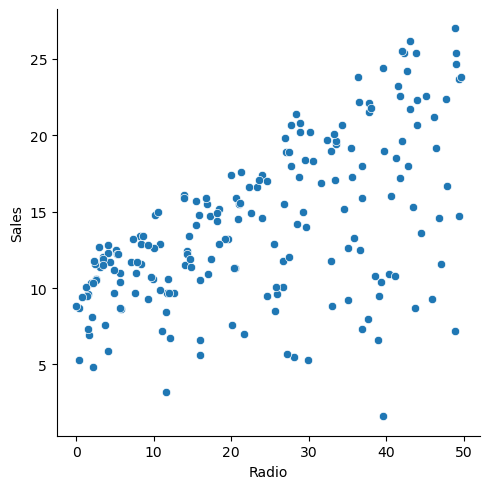

In [27]:
sns.relplot(x='Radio',y='Sales',data=data)

# Checking Duplicate Values


In [43]:
data.duplicated().sum()

np.int64(0)

# Correlation

In [28]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

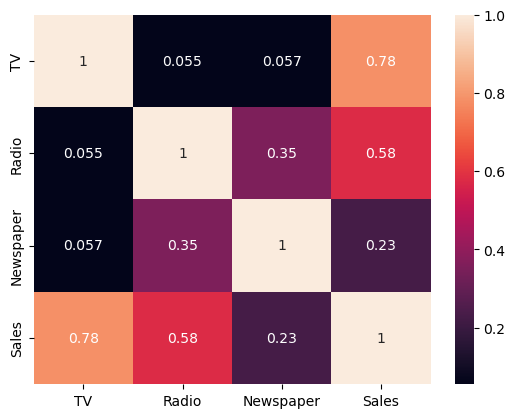

In [29]:
sns.heatmap(data.corr(),annot=True)

# Check outliers

<Axes: ylabel='TV'>

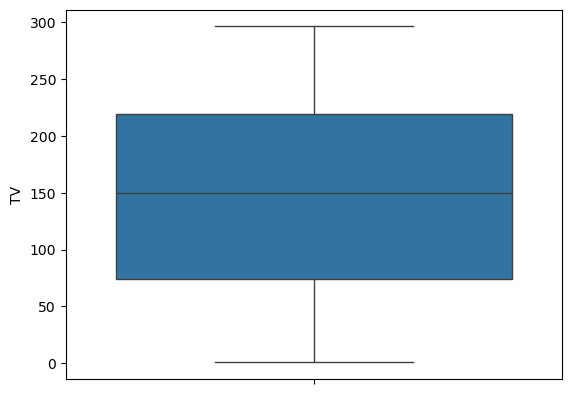

In [30]:
sns.boxplot(data.TV)

<Axes: xlabel='Newspaper'>

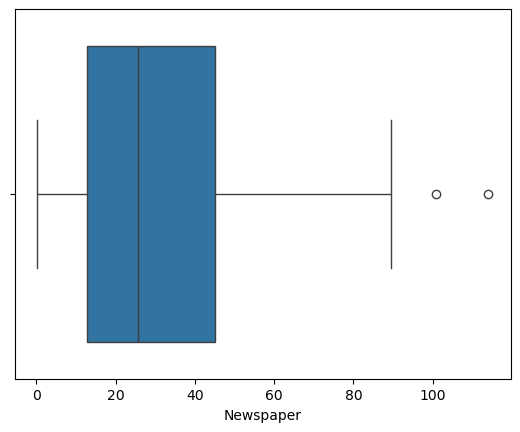

In [31]:
sns.boxplot(x='Newspaper',data=data)
#data.loc[(data.Newspaper>90),'Newspaper'] = data.Newspaper.mean()

<Axes: xlabel='TV'>

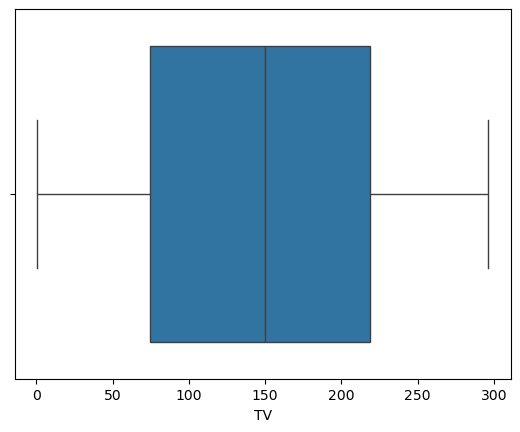

In [32]:
sns.boxplot(x='TV',data=data)

#### Observations from EDA - Insights:
- We see that all the features are linearly correlated with the target variable (sales) with sufficient varaibility witnessed in the graph.
- The features themselves do not show much correlation with each other, which makes them independent of each other. 

# Adjusted R2_score
Metrics to measure the performance of mode

R² score / R-squared It is used to measure the strength of the model. It will compare the regression line with the average line.

Disadvantage of R²: R² score increases as the number of independent variables increases, even if those variables have very less qrelationship with the target variable.

To overcome the above issue, we use Adjusted R²

Adjusted R² Adjusted R² measures the performance of the model by ignoring columns which have very less relationship with the target variable.

Formula: Adjusted\ R² = 1 - (1 - R²) \times \frac{(n - 1)}{(n - p - 1)}

Where:

R² = R² score n = Number of observations (test data) p = Number of independent variables

Note: Adjusted R² score is always less than R² score. If the adjusted R² score is close to R², then we say it’s a good model.

- adjusted R2 score : 1- (1-R2)(n-1)/(n-p-1)
- n is data testing points, p is no. of independent variables, or predictors, or features

In [58]:
adj_r2 = 1-((1-r2)*(40-1)/(40-3-1))
adj_r2

0.8910578594426547